In [1]:
import numpy as np
import gc
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
data = np.load('1MNet.npy')
print data.sum()
import pandas as pd
genes = map(lambda x:x.strip().split()[0],open("Genes.txt").readlines())
len(genes)
df = pd.DataFrame(data,dtype=np.float64)
df.index = genes
df.columns = genes
del data
gc.collect()
df.head()

df_new = df.loc[(df != 0).any(axis=1), (df != 0).any(axis=0)].astype(int)

    
    
    
    
    

2000000


In [2]:
df_new.to_pickle("adj.pkl")

In [19]:
names = df_new.index[(df_new.sum() > 200)].tolist()

In [27]:
new_df = df_new.loc[names,names]

In [2]:
# removing genes with less than degree?
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3,affinity ="precomputed",linkage="average")

model = model.fit(df_new)

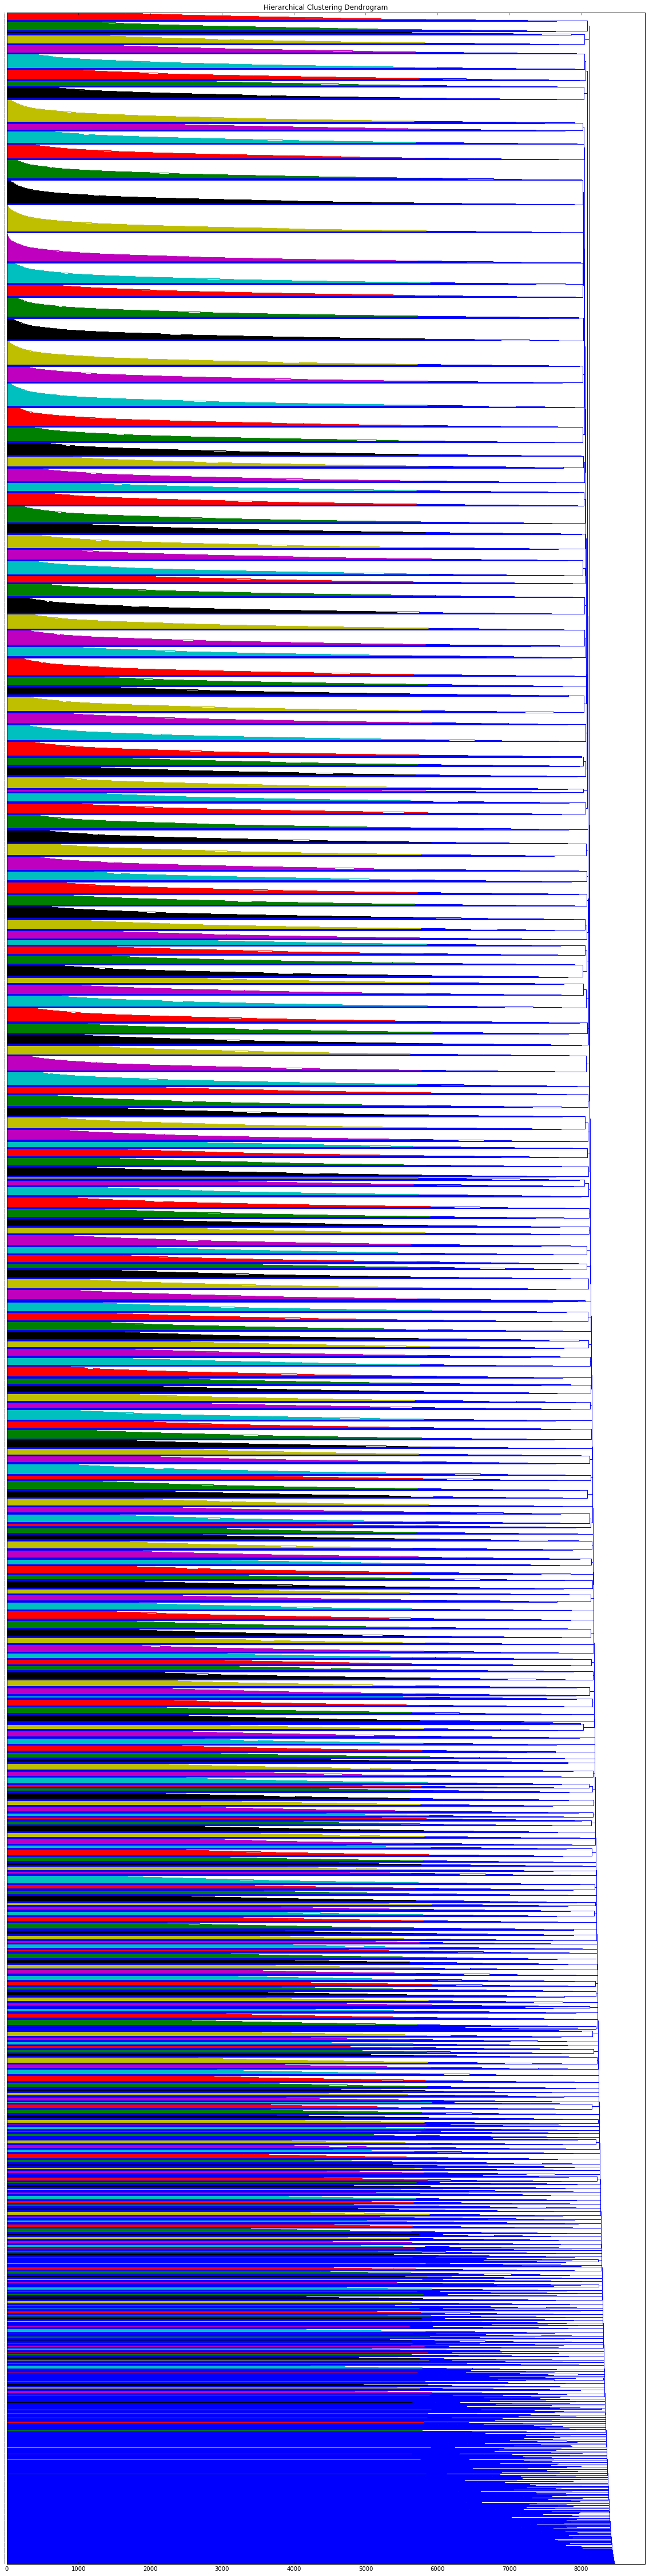

In [5]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pylab
fig = pylab.figure(figsize=(20,80))

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_,count_sort  =True,leaf_font_size=0,orientation='right')

/usr/local/lib/python2.7/dist-packages/sklearn/cluster/hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


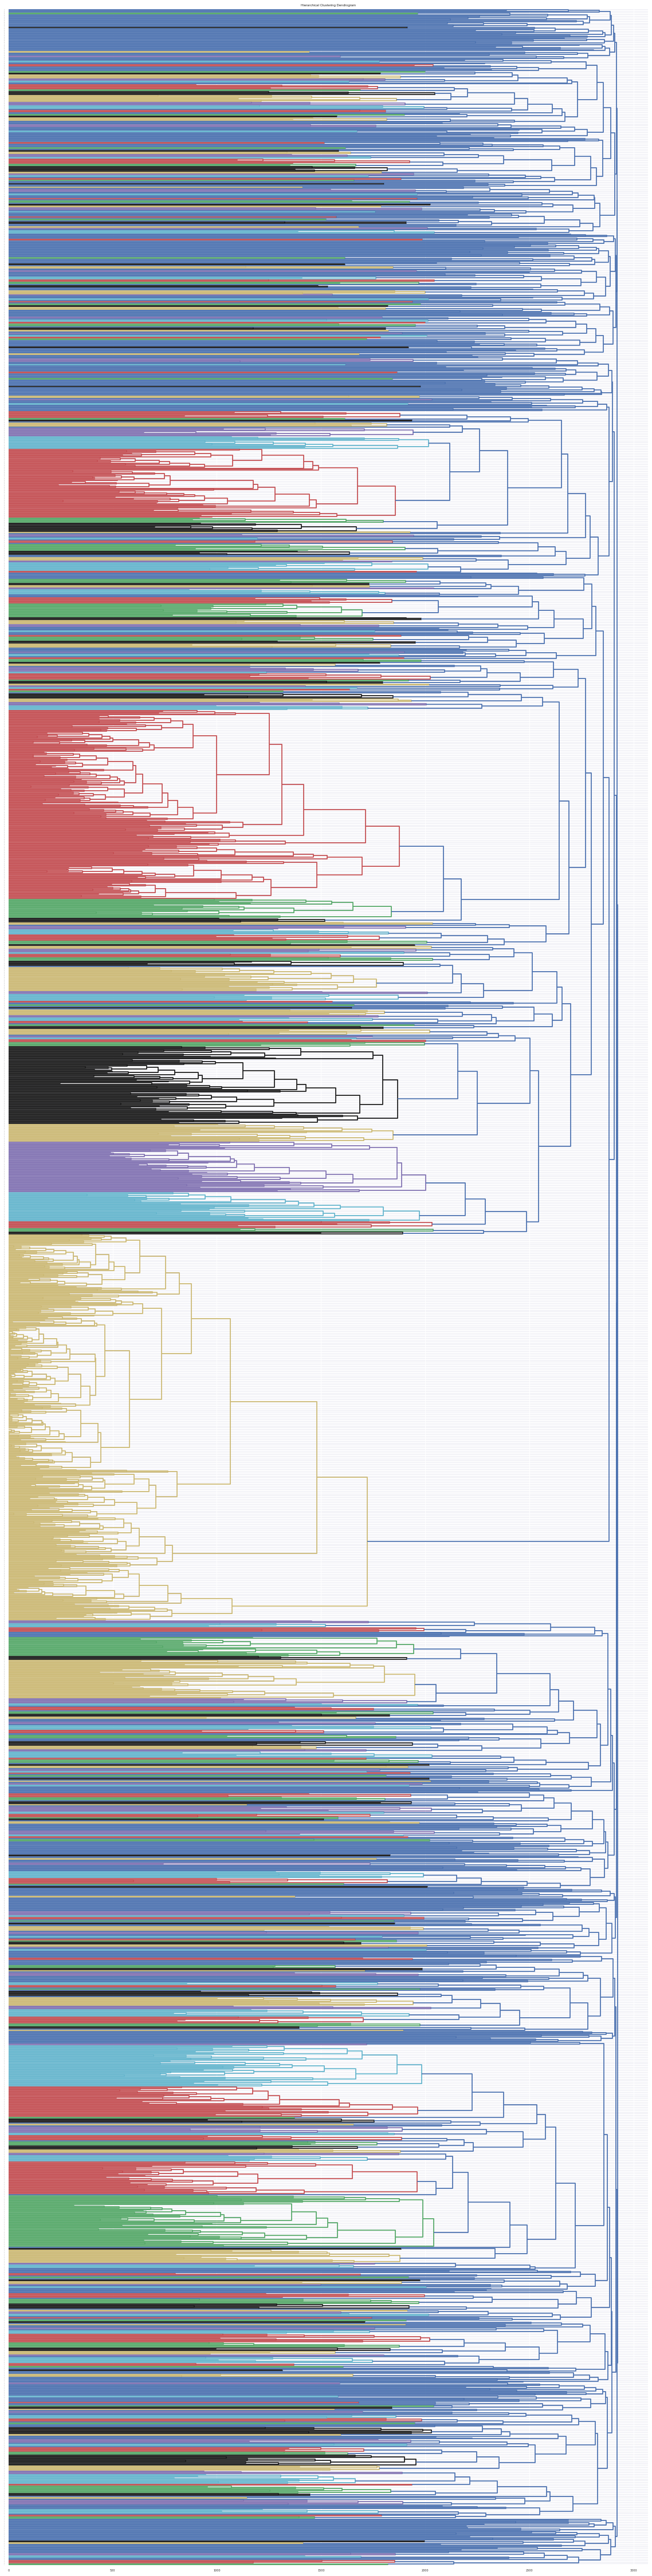

In [41]:
fig = pylab.figure(figsize=(20,80))
model = AgglomerativeClustering(n_clusters=3,linkage="average")
model = model.fit(new_df)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_,count_sort  =True,leaf_font_size=0,orientation='right')

In [42]:
children = model.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
# sns.set(color_codes=True)
# sns.set(font_scale=0.5)
myColors = ((.77, .89, .77, 1.0),(0.0, 0.1, 0.1, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
linkage_matrix = linkage(df_new,method="ward")


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


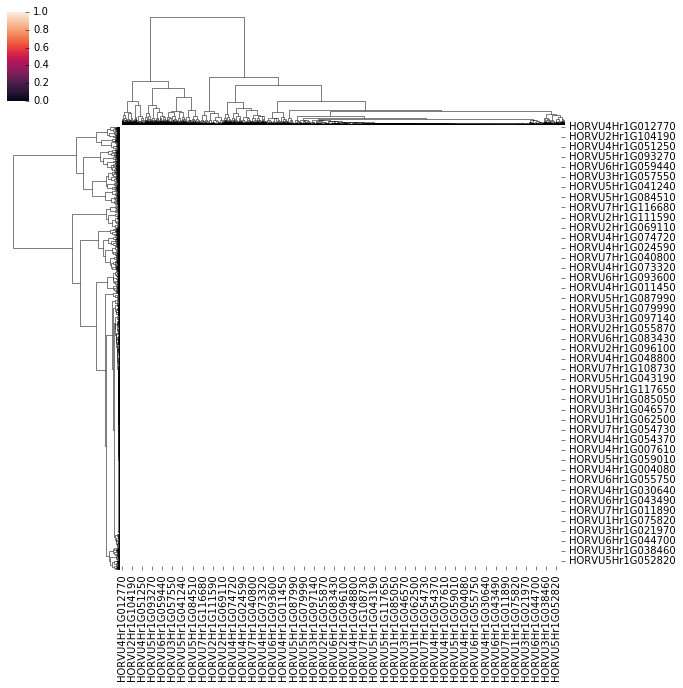

In [7]:
# plot = sns.clustermap(df_new.sample(n=500), row_cluster=True,standard_scale =0,figsize=(15,15))
sns.clustermap(df_new,row_cluster=True,col_cluster=True,cmap=cmap,row_linkage=linkage_matrix,col_linkage=linkage_matrix)
# sns.clustermap(df_new,row_cluster=True,col_cluster=True,cmap=cmap,row_linkage=linkage_matrix,col_linkage=linkage_matrix)

# plt.setp(plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plot.savefig("heatmap.png",dpi=1000)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


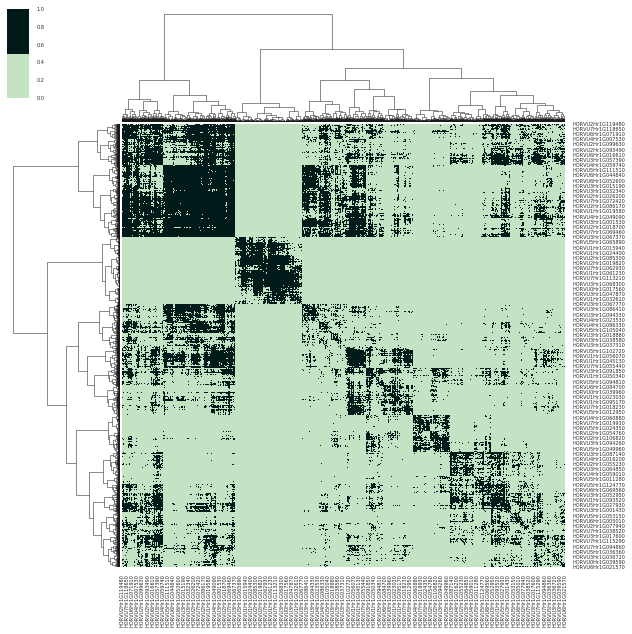

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
# sns.set(color_codes=True)
# sns.set(font_scale=0.5)
myColors = ((.77, .89, .77, 1.0),(0.0, 0.1, 0.1, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
linkage_matrix = linkage(new_df,method="ward")
# plot = sns.clustermap(df_new.sample(n=500), row_cluster=True,standard_scale =0,figsize=(15,15))
sns.clustermap(new_df,row_cluster=True,col_cluster=True,cmap=cmap,row_linkage=linkage_matrix,col_linkage=linkage_matrix)
# plt.setp(plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plot.savefig("heatmap.png",dpi=1000)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26]


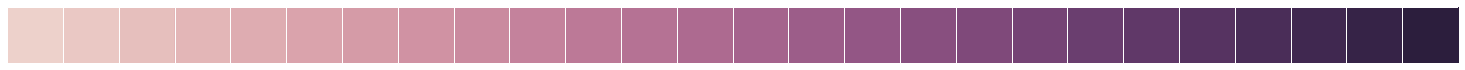

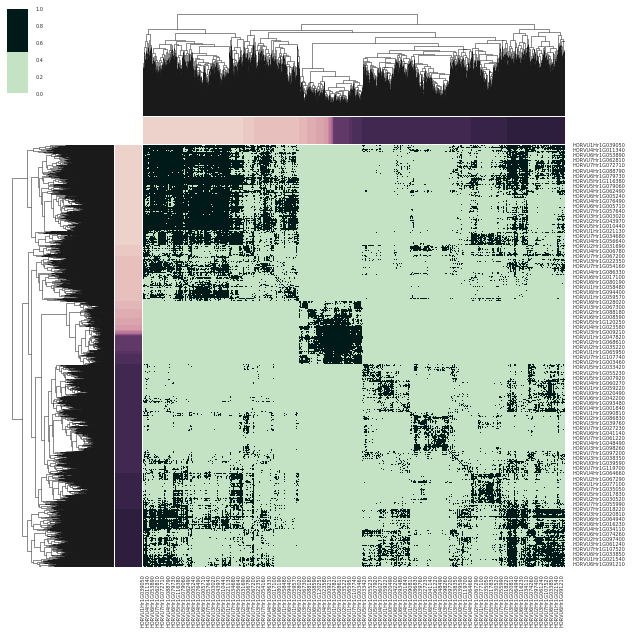

In [192]:
from scipy.cluster.hierarchy import fcluster
# clusters = fcluster(linkage_matrix, 16, criterion='distance')
# clusters = fcluster(linkage_matrix, 3, depth=15)
clusters = fcluster(linkage_matrix, 1.1547005383792491)

# clusters = fcluster(linkage_matrix, 40, criterion='maxclust')
print np.unique(clusters)
clusters
sns.palplot(sns.cubehelix_palette(len(np.unique(clusters))))
current_palette = sns.cubehelix_palette(len(np.unique(clusters)))
a = dict(zip(np.unique(clusters), current_palette))
color_map = map(lambda x:a[x],clusters)
sns.clustermap(new_df,row_cluster=True,col_cluster=True,cmap=cmap,row_linkage=linkage_matrix,col_linkage=linkage_matrix,row_colors = color_map,col_colors = color_map)

In [61]:

current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

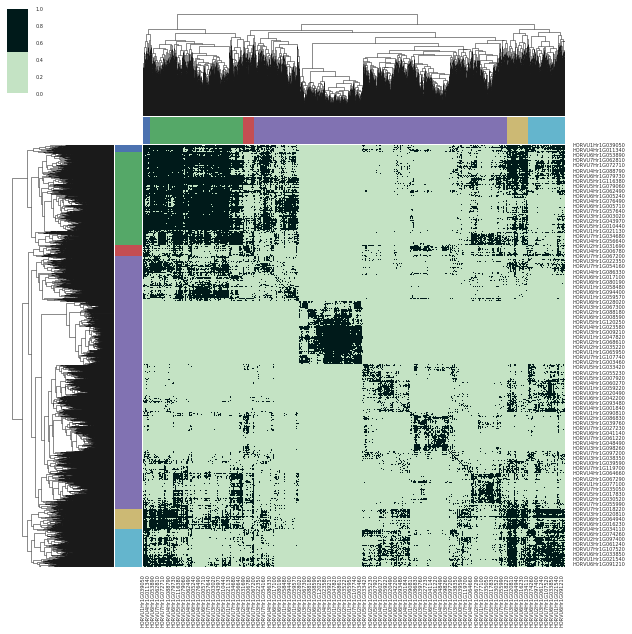

In [66]:
sns.clustermap(new_df,row_cluster=True,col_cluster=True,cmap=cmap,row_linkage=linkage_matrix,col_linkage=linkage_matrix,row_colors = color_map,col_colors = color_map)

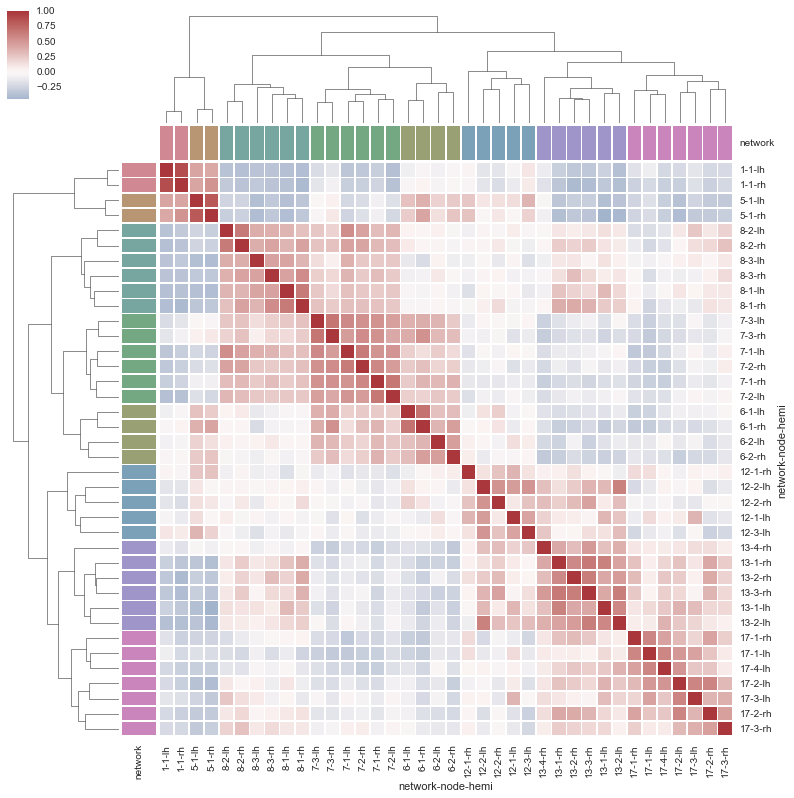

In [2]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

In [6]:
df.corr()

network                   1                   5                   6            \
node                      1                   1                   1             
hemi                     lh        rh        lh        rh        lh        rh   
network node hemi                                                               
1       1    lh    1.000000  0.881516  0.431619  0.418708 -0.084634 -0.031461   
             rh    0.881516  1.000000  0.431953  0.519916 -0.035720  0.036814   
5       1    lh    0.431619  0.431953  1.000000  0.822897  0.283077  0.367033   
             rh    0.418708  0.519916  0.822897  1.000000  0.228128  0.436738   
6       1    lh   -0.084634 -0.035720  0.283077  0.228128  1.000000  0.693108   
             rh   -0.031461  0.036814  0.367033  0.436738  0.693108  1.000000   
        2    lh   -0.077035 -0.049187  0.201292  0.133841  0.290786  0.350493   
             rh   -0.037950 -0.001363  0.250114  0.271610  0.309868  0.461655   
7       1    lh   -0.333648 -0.284145 -0.217666 -0.245344  0.227034  0.147863   
             rh   -0.288166 -0.247166 -0.082428 -0.078763  0.245031  0.352653   
        2    lh   -0.366065 -0.361036 -0.171967 -0.214859  0.217118  0.207191   
             rh   -0.325680 -0.274151 -0.193388 -0.173958  0.246087  0.298186   
        3    lh   -0.196770 -0.142392 -0.008371 -0.037753  0.369612  0.382501   
             rh   -0.144566 -0.070452  0.051905  0.097600  0.395075  0.532976   
8       1    lh   -0.366818 -0.358625 -0.364774 -0.379820 -0.030369 -0.052446   
             rh   -0.388756 -0.402173 -0.333552 -0.324281 -0.035053 -0.038070   
        2    lh   -0.352529 -0.302286 -0.247059 -0.278219  0.036143  0.009541   
             rh   -0.363982 -0.339989 -0.242530 -0.265208  0.090089  0.015264   
        3    lh   -0.341524 -0.315931 -0.377999 -0.395428 -0.123868 -0.193486   
             rh   -0.350452 -0.343379 -0.314160 -0.324271 -0.079411 -0.063471   
12      1    lh   -0.049793 -0.112697  0.153962 -0.022554 -0.064311 -0.118265   
             rh    0.026902 -0.036909  0.267424  0.275706 -0.096746 -0.020387   
        2    lh   -0.144335 -0.144277  0.113587 -0.005466  0.127269  0.039398   
             rh   -0.141253 -0.189683  0.131883  0.105608  0.220846  0.124631   
        3    lh    0.119250  0.084633  0.348999  0.200792 -0.004763  0.011114   
13      1    lh   -0.261589 -0.324230 -0.379322 -0.453229 -0.162460 -0.298279   
             rh   -0.272701 -0.332886 -0.330309 -0.377116 -0.189019 -0.280776   
        2    lh   -0.370021 -0.374322 -0.347533 -0.420549 -0.108287 -0.233718   
             rh   -0.327967 -0.405959 -0.287812 -0.326339 -0.175107 -0.260633   
        3    rh   -0.327186 -0.396053 -0.283475 -0.335078 -0.147251 -0.207017   
        4    rh   -0.103326 -0.152463 -0.040606 -0.082185 -0.158301 -0.177918   
17      1    lh   -0.099781 -0.212964 -0.175772 -0.198837 -0.250793 -0.293931   
             rh   -0.161649 -0.262915 -0.237626 -0.244067 -0.277102 -0.301196   
        2    lh   -0.206379 -0.273370 -0.359879 -0.394522 -0.083844 -0.189028   
             rh   -0.212601 -0.266456 -0.299152 -0.295150 -0.073452 -0.171742   
        3    lh   -0.142770 -0.174222 -0.245179 -0.303354 -0.083266 -0.206842   
             rh   -0.204326 -0.223572 -0.302654 -0.277378 -0.015720 -0.109640   
        4    lh   -0.219283 -0.273626 -0.282767 -0.279381 -0.144766 -0.230404   

network                                       7              ...           13  \
node                      2                   1              ...            2   
hemi                     lh        rh        lh        rh    ...           rh   
network node hemi                                            ...                
1       1    lh   -0.077035 -0.037950 -0.333648 -0.288166    ...    -0.327967   
             rh   -0.049187 -0.001363 -0.284145 -0.247166    ...    -0.405959   
5       1    lh    0.201292  0.250114 -0.217666 -0.082428    ...    -0.287812   
             rh    0.133841  0

In [11]:
print sns.__version__

0.7.0


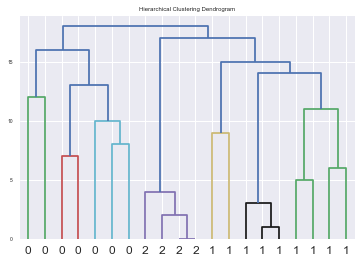

In [13]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_,count_sort  =True)

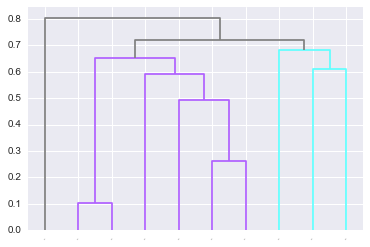

In [20]:
# Init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load data
from sklearn.datasets import load_diabetes

# Clustering
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list
from scipy.spatial import distance
from fastcluster import linkage # You can use SciPy one too

%matplotlib inline

# Dataset
A_data = load_diabetes().data
DF_diabetes = pd.DataFrame(A_data, columns = ["attr_%d" % j for j in range(A_data.shape[1])])

# Absolute value of correlation matrix, then subtract from 1 for disimilarity
DF_dism = 1 - np.abs(DF_diabetes.corr())

# Compute average linkage
A_dist = distance.squareform(DF_dism.as_matrix())
Z = linkage(A_dist,method="average")

# Color mapping
dflt_col = "#808080"   # Unclustered gray
D_leaf_colors = {"attr_1": dflt_col,

                 "attr_4": "#B061FF", # Cluster 1 indigo
                 "attr_5": "#B061FF",
                 "attr_2": "#B061FF",
                 "attr_8": "#B061FF",
                 "attr_6": "#B061FF",
                 "attr_7": "#B061FF",

                 "attr_0": "#61ffff", # Cluster 2 cyan
                 "attr_3": "#61ffff",
                 "attr_9": "#61ffff",
                 }

# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link
link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors["attr_%d"%x]
    for x in i12)
  link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

# Dendrogram
D = dendrogram(Z=Z, labels=DF_dism.index, color_threshold=None,
  leaf_font_size=0, leaf_rotation=45, link_color_func=lambda x: link_cols[x])